<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\siddh\AppData\Local\Temp\ipykernel_13948\4140409178.py:6: SyntaxWarning: invalid escape sequence '\m'
  image = cv2.imread('Assets\morf_test.png', cv2.IMREAD_GRAYSCALE)


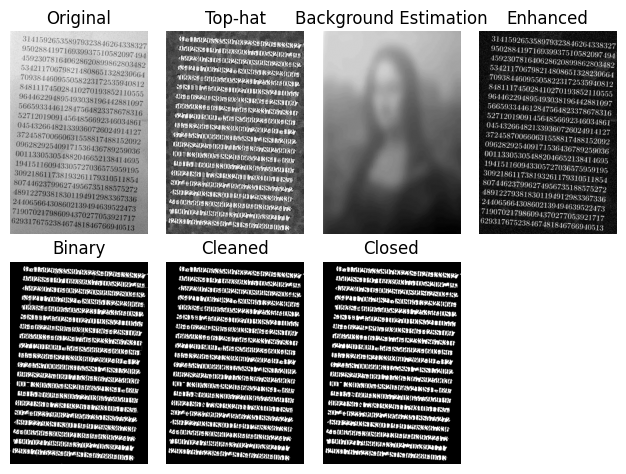

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('Assets\morf_test.png', cv2.IMREAD_GRAYSCALE)

# Apply morphological operations to estimate background
kernel_size = 15  # You can experiment with this size
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Option 1: Use Top-hat to enhance bright regions (text on dark background)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

# Option 2: Use Bottom-hat to enhance dark regions (text on bright background)
# bottomhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

# Background estimation using morphological closing (useful if you go with subtraction)
background = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
enhanced = cv2.subtract(background, image)

# Combine enhancement (Top-hat or Subtraction)
processed = tophat  # Or use: processed = enhanced

# Apply global thresholding (Otsu's method)
_, binary = cv2.threshold(processed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optional: Denoising with morphological opening (remove small noise)
noise_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, noise_kernel)

# Optional: Fill gaps between characters using closing
closed = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, noise_kernel)

# Show results
titles = ['Original', 'Top-hat', 'Background Estimation', 'Enhanced', 'Binary', 'Cleaned', 'Closed']
images = [image, tophat, background, enhanced, binary, cleaned, closed]

for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
## σB2​(t)=ω0​(t)ω1​(t)[μ0​(t)−μ1​(t)]2